# **Nama : Bimasakti Cahyo Utomo**
# **NIM : 2209106021**

Segmentasi gambar Bandara menggunakan Yolov11

## **Instal Library**

In [1]:
pip install opencv-python ultralytics numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

## **Import Library**

In [8]:
from ultralytics import YOLO
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt

## **Pilih Model**

In [9]:
model = YOLO("yolo11x-seg.pt")

## **Segmentasi**

In [26]:
img = cv2.imread("/content/istockphoto-1342139743-612x612.jpg")

yolo_classes = list(model.names.values())
classes_ids = [yolo_classes.index(clas) for clas in yolo_classes]

conf = 0.3
results = model.predict(img, conf=conf)

colors = [random.choices(range(256), k=3) for _ in classes_ids]


0: 480x640 15 airplanes, 4177.2ms
Speed: 4.0ms preprocess, 4177.2ms inference, 47.3ms postprocess per image at shape (1, 3, 480, 640)


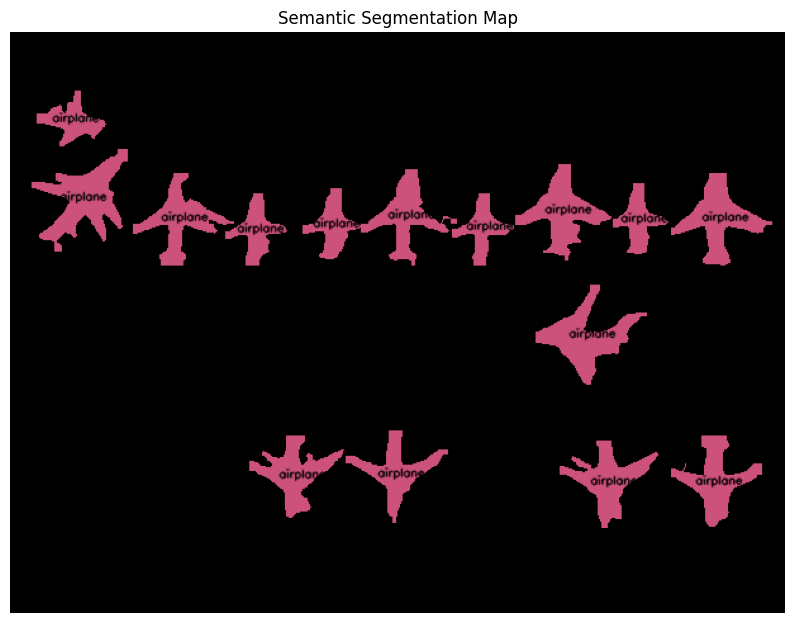

In [36]:
sem_mask = np.zeros_like(img)

for result in results:
    for mask, box in zip(result.masks.xy, result.boxes):
        class_id = int(box.cls[0])
        points = np.int32([mask])
        color = colors[class_id]

        cv2.fillPoly(sem_mask, points, color)

        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cx, cy = (x1 + x2) // 2, (y1 + y2) // 2

        label = yolo_classes[class_id]
        cv2.putText(sem_mask, label, (cx - 15, cy+2),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 0), 1, cv2.LINE_AA)

sem_rgb = cv2.cvtColor(sem_mask, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(sem_rgb)
plt.axis("off")
plt.title("Semantic Segmentation Map")
plt.show()

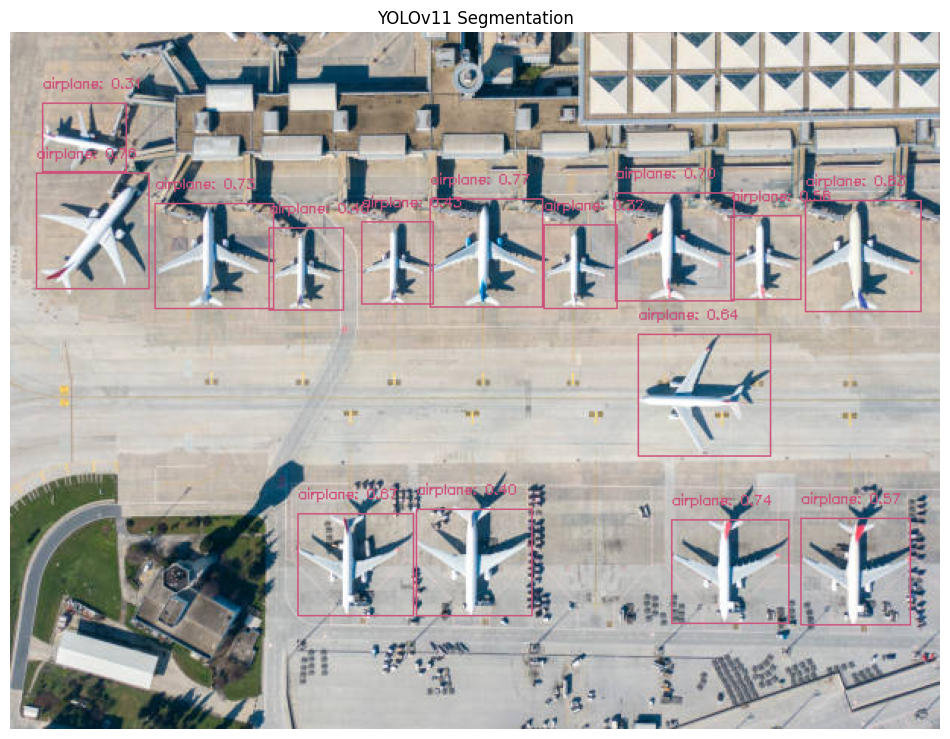

In [28]:
for result in results:
    for mask, box in zip(result.masks.xy, result.boxes):
        points = np.int32([mask])
        class_id = int(box.cls[0])
        confidence = float(box.conf[0])
        color = colors[classes_ids.index(class_id)]

        # # segmentation mask
        # cv2.fillPoly(img, points, color)

        # Bounding box coordinates
        x1, y1, x2, y2 = map(int, box.xyxy[0])

        # bounding box
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 1)

        # label text dengan class dan confidence
        label_text = f"{yolo_classes[class_id]}: {confidence:.2f}"

        # label text
        cv2.putText(img, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX,
                    0.3, color, 1)

# Konversi Warna dari BGR ke RGB untuk Google Colab
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# tampilkan Hasil
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)
plt.axis("off")
plt.title("YOLOv11 Segmentation")
plt.show()